<a href="https://colab.research.google.com/github/TomasRipsky/Ai-Collab/blob/Fuzzy_Logic/FuzzyTaskRipsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICAL PART

## Problem Description

Covid-19 Detection Problem

Let's create a fuzzy control system which models if a person with a certain type of sintom has or not covid-19.

We would formulate this problem as:
* Antecednets (Inputs)
  - `Fever` done
      * Fuzzy set: normal,low, medium, high, tooHigh.
  - `Cough` done
      * Fuzzy set: none, slight, moderate, high.
  - `Difficulty breathing` done
      * Fuzzy set: none, low, medium, high.
  - `Fatigue` done
      * Fuzzy set: none, low, medium, high.
  - `Muscle and body aches and pains` done
      * Fuzzy set: none, low, medium, high.
  - `Headache` done
      * Fuzzy set: none, low, medium, high.
  - `Loss of smell or taste` done
      * Fuzzy set: none, partial, total.
  - `Sore throat` done
      * Fuzzy set: none, low, medium, high.
  - `Congestion` done
      * Fuzzy set: none, low, medium, high.
  - `Nausea` done
      * Fuzzy set: none, low, medium, high.
  - `Diarrhea` done
      * Fuzzy set: yes,no.
  - `chest tightness` done
      * Fuzzy set: yes,no.
  - `Confusion` done
      * Fuzzy set: none, some, medium, high.
  - `difficulty waking up`done
      * Fuzzy set: yes,no.
  - `bluish lips` done
      * Fuzzy set: yes,no.
  - `grizzled skin` done
      * Fuzzy set: yes,no.
  - `pale nail beds` done
      * Fuzzy set: yes,no.
  - `nasal discharge` done
      * Fuzzy set: none, some, medium, high.
  - `pale face` done
      * Fuzzy set: yes,no.
  - `pain when swallowing` done
      * Fuzzy set: yes,no.


* Consequents (Outputs)
   - `Covid-19 case`
      * Fuzzy set: yes, maybe, no.

* Rules
   - IF the *Fever* was high  *and* the *Cough* was high *and* the *Loss of smell or taste* was total,THEN covid-19 yes.(1) done

   - IF the *Fever* was low  *and* the *Cough* was none *and* the *Loss of smell or taste* was none,THEN covid-19 no.(2) done

   - IF the *Difficulty Breathing* was medium, THEN covid-19 yes.(3) done

   - IF the *Difficulty breathing* was high *and* the *Fatigue* was high *and* the *Muscle and body aches and pains* was high, THEN covid-19 yes.(4) done

   - IF the *Headache* was high *and* the *Loss of smell or taste* was total, THEN covid-19 yes.(5) done

   - IF the *Sore throat* was high  *and* the *Congestion* was high *and* the *Nausea* was high,THEN covid-19 maybe.(6) done

   - IF the *Sore throat* was high  *and* the *Congestion* was none *and* the *Nausea* was none,THEN covid-19 maybe.(7) done

   - IF the *Diarrhea* was yes  *and* the *chest tightness* was yes *and* the *Confusion* was high,THEN covid-19 no.(8) done

   - IF the *difficulty waking up* was yes  *and* the *bluish lips* was yes *and* the *grizzled skin* was yes, *and* the *pale nail beds* was yes,THEN covid-19 no.(9) done

   - IF the *nasal discharge* was medium  *and* the *pale face* was yes *and* the *pain when swallowing* was yes,THEN covid-19 maybe.(10) done

   - IF the *nasal discharge* was high  *and* the *Diarrhea* was yes, THEN covid-19 no.(11) done

   - IF the *Cough* was none  *and* the *Fever* was medium, THEN covid-19 maybe.(12) done

   - IF the *Sore throat* was medium  *and* the *Fever* was medium, THEN covid-19 maybe.(13) done

   - IF the *Sore throat* was low  *and* the *Nausea* was high, THEN covid-19 maybe.(14) done

   - IF the *Headache* was none *and* the *Loss of smell or taste* was total, THEN covid-19 yes.(15) done

   - IF the *difficulty waking up* was yes  *and* the *bluish lips* was yes *and* the *grizzled skin* was yes, *and* the *pale nail beds* was yes,THEN covid-19 no.(16) done

   - IF the *Diarrhea* was yes  *and* the *chest tightness* was yes *and* the *Confusion* was some,THEN covid-19 no.(17) done

   - IF the *nasal discharge* was high  *and* the *Diarrhea* was yes, THEN covid-19 maybe.(18) done

   - IF the *bluish lips* was yes *and* the *grizzled skin* was yes, *and* the *pale nail beds* was yes,THEN covid-19 no.(19) done

   - IF the *difficulty waking up* was yes  *and* the *pale nail beds* was yes,THEN covid-19 no.(20) done

   - IF the *Fever* was medium  *and* the *Cough* was high *and* the *Loss of smell or taste* was partial,THEN covid-19 yes.(21) done

   - IF the *Smell Loss* was total,THEN covid-19 yes.(22) done

   - IF the *Smell Loss* was partial,THEN covid-19 yes.(23) done

   - IF the *Fever* was too high,THEN covid-19 yes.(24) done

   - IF the *Difficulty Breathing* was high,THEN covid-19 yes.(25) done

* Usage
   - If i tell someone you have x,y sintoms the system will tell me if the person has covid, has not have it or probably have it.




## Implementation of the fuzzy model


Here first we must do the corresponding imports in order to make our model work

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 6.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=be182b69de1fbbf66accba544f70a43f3076fbbf5d51a08805717b2253570d76
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In this following celd we stablish all the sintoms with its corresponding values as well as diving each one into the categories that we described before stablishing the inferior an superior limit for each division.


In [ ]:
# functions
fever = ctrl.Antecedent(np.arange(36, 40, 1), 'fever')
SmellLoss = ctrl.Antecedent(np.arange(0, 3, 1), 'SmellLoss')
Cough = ctrl.Antecedent(np.arange(0, 5, 1), 'Cough')
DifficultyBreathing = ctrl.Antecedent(np.arange(0, 5, 1), 'DifficultyBreathing')
Fatigue = ctrl.Antecedent(np.arange(0, 5, 1), 'Fatigue')
MuscleAches = ctrl.Antecedent(np.arange(0, 5, 1), 'MuscleAches')
Cough = ctrl.Antecedent(np.arange(0, 5, 1), 'Cough')
Headache  = ctrl.Antecedent(np.arange(0, 5, 1), 'Headache')
SoreThroat   = ctrl.Antecedent(np.arange(0, 5, 1), 'SoreThroat')
Congestion   = ctrl.Antecedent(np.arange(0, 5, 1), 'Congestion')
nausea   = ctrl.Antecedent(np.arange(0, 4, 1), 'nausea')
diarrhea   = ctrl.Antecedent(np.arange(0, 2, 1), 'diarrhea')
chest_tightness = ctrl.Antecedent(np.arange(0, 2, 1), 'chest_tightness')
confusion = ctrl.Antecedent(np.arange(0, 4, 1), 'confusion')
difficulty_waking_up  = ctrl.Antecedent(np.arange(0, 2, 1), 'difficulty_waking_up')
bluish_lips  = ctrl.Antecedent(np.arange(0, 2, 1), 'bluish_lips')
grizzled_skin  = ctrl.Antecedent(np.arange(0, 2, 1), 'grizzled_skin')
pale_nail_beds   = ctrl.Antecedent(np.arange(0, 2, 1), 'pale_nail_beds')
nasal_discharge  = ctrl.Antecedent(np.arange(0, 4, 1), 'nasal_discharge')
pale_face    = ctrl.Antecedent(np.arange(0, 2, 1), 'pale_face')
pain_when_swallowing     = ctrl.Antecedent(np.arange(0, 2, 1), 'pain_when_swallowing')
Covid = ctrl.Consequent(np.arange(0, 10, 1), 'Covid')

# DESCRIPTION OF EACH CLASS

fever['normal'] = fuzz.trimf(fever.universe, [36.0, 36.5, 37.0])
fever['low'] = fuzz.trimf(fever.universe, [35.5, 36.0, 36.5])
fever['medium'] = fuzz.trimf(fever.universe, [36.5, 37.0, 37.5])
fever['high'] = fuzz.trimf(fever.universe, [37.5, 38.0, 38.5])
fever['too high'] = fuzz.trimf(fever.universe, [38.5, 39.0, 39.5])

Cough['none'] = fuzz.trimf(Cough.universe, [0, 0, 0])
Cough['slight'] = fuzz.trimf(Cough.universe, [0, 1, 2])
Cough['moderate'] = fuzz.trimf(Cough.universe, [2, 3, 4])
Cough['high'] = fuzz.trimf(Cough.universe, [4, 5, 5])

DifficultyBreathing['none'] = fuzz.trimf(DifficultyBreathing.universe, [0, 0, 0])
DifficultyBreathing['low'] = fuzz.trimf(DifficultyBreathing.universe, [0, 1, 2])
DifficultyBreathing['medium'] = fuzz.trimf(DifficultyBreathing.universe, [2, 3, 4])
DifficultyBreathing['high'] = fuzz.trimf(DifficultyBreathing.universe, [4, 5, 5])

Fatigue['none'] = fuzz.trimf(Fatigue.universe, [0, 0, 0])
Fatigue['low'] = fuzz.trimf(Fatigue.universe, [0, 1, 2])
Fatigue['medium'] = fuzz.trimf(Fatigue.universe, [2, 3, 4])
Fatigue['high'] = fuzz.trimf(Fatigue.universe, [4, 5, 5])

MuscleAches['none'] = fuzz.trimf(MuscleAches.universe, [0, 0, 0])
MuscleAches['low'] = fuzz.trimf(MuscleAches.universe, [0, 1, 2])
MuscleAches['medium'] = fuzz.trimf(MuscleAches.universe, [2, 3, 4])
MuscleAches['high'] = fuzz.trimf(MuscleAches.universe, [4, 5, 5])

Headache['none'] = fuzz.trimf(Headache.universe, [0, 0, 0])
Headache['low'] = fuzz.trimf(Headache.universe, [0, 1, 2])
Headache['medium'] = fuzz.trimf(Headache.universe, [2, 3, 4])
Headache['high'] = fuzz.trimf(Headache.universe, [4, 5, 5])

SmellLoss['none'] = fuzz.trimf(SmellLoss.universe, [0, 0, 0])
SmellLoss['partial'] = fuzz.trimf(SmellLoss.universe, [0, 1, 2])
SmellLoss['total'] = fuzz.trimf(SmellLoss.universe, [2, 3, 3])

SoreThroat['none'] = fuzz.trimf(SoreThroat.universe, [0, 0, 0])
SoreThroat['low'] = fuzz.trimf(SoreThroat.universe, [0, 1, 2])
SoreThroat['medium'] = fuzz.trimf(SoreThroat.universe, [2, 3, 4])
SoreThroat['high'] = fuzz.trimf(SoreThroat.universe, [4, 5, 5])

Congestion['none'] = fuzz.trimf(Congestion.universe, [0, 0, 0])
Congestion['low'] = fuzz.trimf(Congestion.universe, [0, 1, 2])
Congestion['medium'] = fuzz.trimf(Congestion.universe, [2, 3, 4])
Congestion['high'] = fuzz.trimf(Congestion.universe, [4, 5, 5])

nausea['none'] = fuzz.trimf(nausea.universe, [0, 0, 1])
nausea['low'] = fuzz.trimf(nausea.universe, [0, 1, 2])
nausea['medium'] = fuzz.trimf(nausea.universe, [1, 2, 3])
nausea['high'] = fuzz.trimf(nausea.universe, [2, 3, 4])

diarrhea['yes'] = fuzz.trimf(diarrhea.universe, [1, 1, 2])
diarrhea['no'] = fuzz.trimf(diarrhea.universe, [0, 0, 1])

chest_tightness['yes'] = fuzz.trimf(chest_tightness.universe, [1, 1, 2])
chest_tightness['no'] = fuzz.trimf(chest_tightness.universe, [0, 0, 1])

confusion['none'] = fuzz.trimf(confusion.universe, [0, 0, 1])
confusion['some'] = fuzz.trimf(confusion.universe, [0, 1, 2])
confusion['medium'] = fuzz.trimf(confusion.universe, [1, 2, 3])
confusion['high'] = fuzz.trimf(confusion.universe, [2, 3, 4])

difficulty_waking_up['yes'] = fuzz.trimf(difficulty_waking_up.universe, [1, 1, 2])
difficulty_waking_up['no'] = fuzz.trimf(difficulty_waking_up.universe, [0, 0, 1])

bluish_lips['yes'] = fuzz.trimf(bluish_lips.universe, [1, 1, 2])
bluish_lips['no'] = fuzz.trimf(bluish_lips.universe, [0, 0, 1])

grizzled_skin['yes'] = fuzz.trimf(grizzled_skin.universe, [1, 1, 2])
grizzled_skin['no'] = fuzz.trimf(grizzled_skin.universe, [0, 0, 1])

pale_nail_beds['yes'] = fuzz.trimf(pale_nail_beds.universe, [1, 1, 2])
pale_nail_beds['no'] = fuzz.trimf(pale_nail_beds.universe, [0, 0, 1])

nasal_discharge['none'] = fuzz.trimf(nasal_discharge.universe, [0, 0, 1])
nasal_discharge['some'] = fuzz.trimf(nasal_discharge.universe, [0, 1, 2])
nasal_discharge['medium'] = fuzz.trimf(nasal_discharge.universe, [1, 2, 3])
nasal_discharge['high'] = fuzz.trimf(nasal_discharge.universe, [2, 3, 4])

pale_face['yes'] = fuzz.trimf(pale_face.universe, [1, 1, 2])
pale_face['no'] = fuzz.trimf(pale_face.universe, [0, 0, 1])

pain_when_swallowing['yes'] = fuzz.trimf(pain_when_swallowing.universe, [1, 1, 2])
pain_when_swallowing['no'] = fuzz.trimf(pain_when_swallowing.universe, [0, 0, 1])

#DESCRIPTION OF THE CONSECUENCE

Covid['no'] = fuzz.trimf(Covid.universe,  [0, 0, 5])
Covid['maybe'] = fuzz.trimf(Covid.universe,[2, 5, 8] )
Covid['yes'] = fuzz.trimf(Covid.universe, [5, 10, 10])



## View of each one of the syntoms

To help understand how each syntom looks like, use the ``view`` methods.
These return the matplotlib `Figure` and `Axis` objects. They are persistent



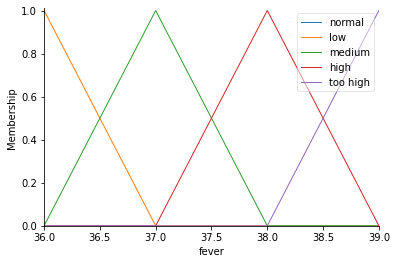

In [ ]:
# You can see how these look with .view()
fever.view()

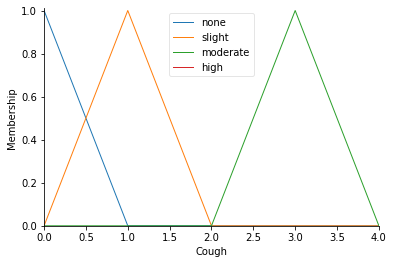

In [ ]:
Cough.view()

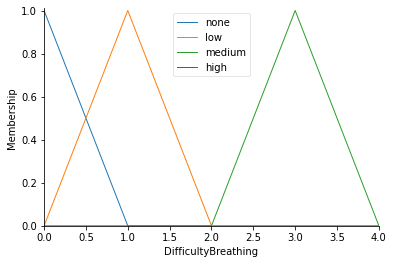

In [ ]:
DifficultyBreathing.view()

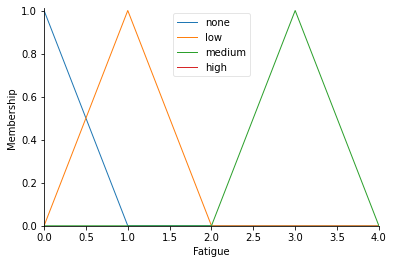

In [ ]:
Fatigue.view()

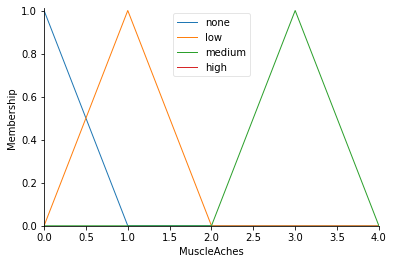

In [ ]:
MuscleAches.view()

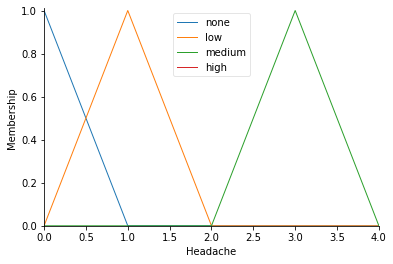

In [ ]:
Headache.view()

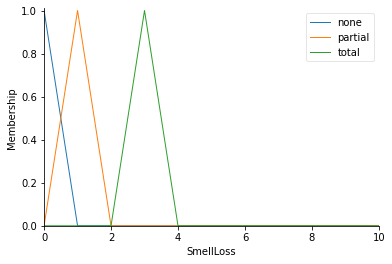

In [ ]:
SmellLoss.view()

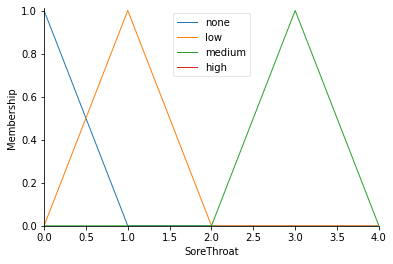

In [ ]:
SoreThroat.view()

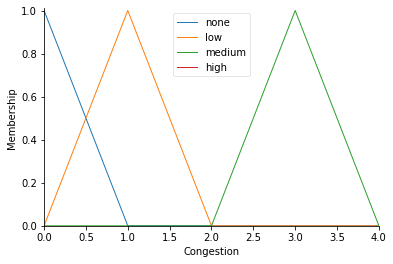

In [ ]:
Congestion.view()

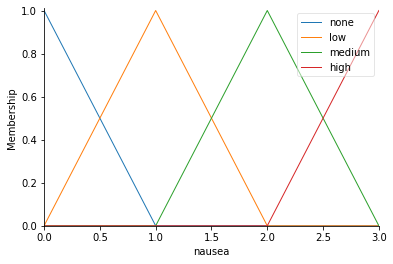

In [ ]:
nausea.view()

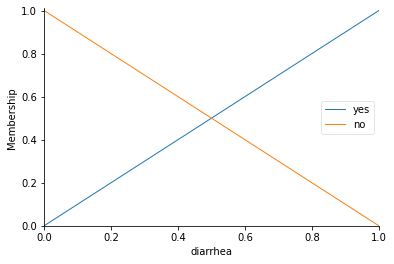

In [ ]:
diarrhea.view()

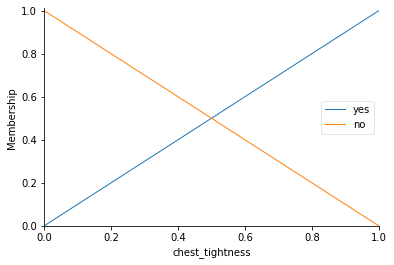

In [ ]:
chest_tightness.view()

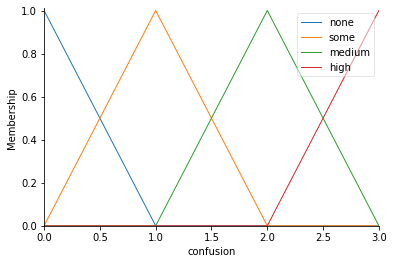

In [ ]:
confusion.view()

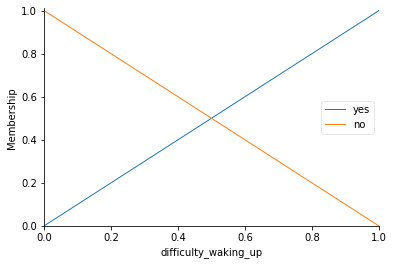

In [ ]:
difficulty_waking_up.view()

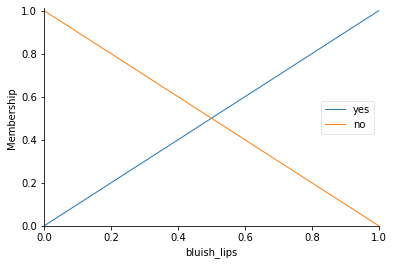

In [ ]:
bluish_lips.view()

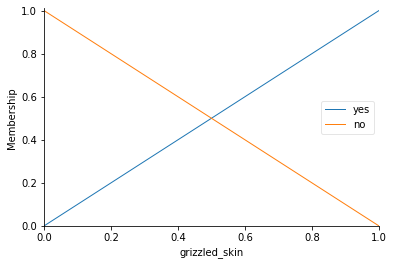

In [ ]:
grizzled_skin.view()

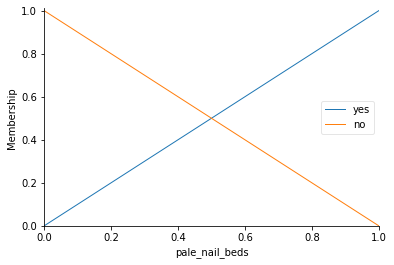

In [ ]:
pale_nail_beds.view()

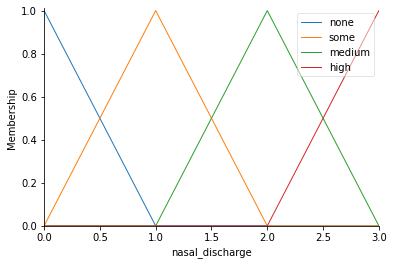

In [ ]:
nasal_discharge.view()

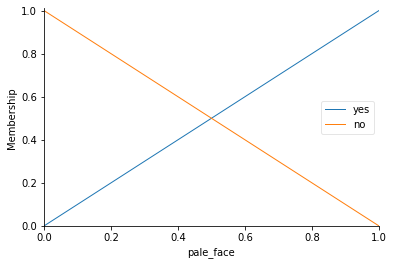

In [ ]:
pale_face.view()

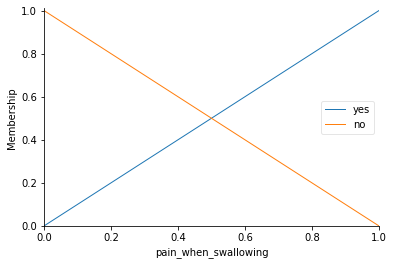

In [ ]:
pain_when_swallowing.view()

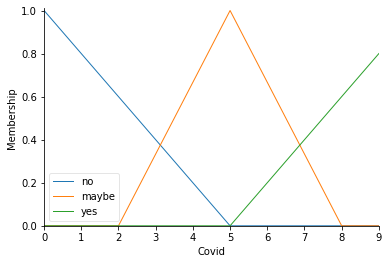

In [ ]:
#View of the consequence
Covid.view()

Fuzzy rules
-----------
Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider the rules that we stablish before this in the problem description section

In [ ]:
#YES
rule1 = ctrl.Rule(fever['high'] & Cough['high'] & SmellLoss['total'], Covid['yes'])
rule5 = ctrl.Rule(Headache['high'] & SmellLoss['total'], Covid['yes'])
rule15 = ctrl.Rule(Headache['none'] & SmellLoss['total'], Covid['yes'])
rule21 = ctrl.Rule(fever['medium'] & Cough['high'] & SmellLoss['partial'], Covid['yes'])
rule22 = ctrl.Rule(SmellLoss['total'],Covid['yes'])
rule23 = ctrl.Rule(SmellLoss['partial'],Covid['yes'])
rule24 = ctrl.Rule(fever['too high'],Covid['yes'])
rule25 = ctrl.Rule(DifficultyBreathing['high'],Covid['yes'])
rule3 = ctrl.Rule(DifficultyBreathing['medium'],Covid['yes'])
rule4 = ctrl.Rule(DifficultyBreathing['high'] & Fatigue['high'] & MuscleAches['high'], Covid['yes'])

#NO
rule8 = ctrl.Rule(diarrhea['yes'] & chest_tightness['yes'] & confusion['high'], Covid['no'])
rule2 = ctrl.Rule(fever['low'] & Cough['none'] & SmellLoss['none'], Covid['no'])
rule9 = ctrl.Rule(difficulty_waking_up['yes'] & bluish_lips['yes'] & grizzled_skin['yes'] & pale_nail_beds['yes'], Covid['no'])
rule11 = ctrl.Rule(nasal_discharge['high'] & diarrhea['yes'], Covid['no'])
rule16 = ctrl.Rule(difficulty_waking_up['yes'] & bluish_lips['yes'] & grizzled_skin['yes'] & pale_nail_beds['yes'], Covid['no'])
rule17 = ctrl.Rule(diarrhea['yes'] & chest_tightness['yes'] & confusion['some'], Covid['no'])
rule19 = ctrl.Rule(bluish_lips['yes'] & grizzled_skin['yes'] & pale_nail_beds['yes'], Covid['no'])
rule20 = ctrl.Rule(difficulty_waking_up['yes'] & pale_nail_beds['yes'], Covid['no'])

#MAYBE
rule6 = ctrl.Rule(SoreThroat['high'] & Congestion['high'] & nausea['high'], Covid['maybe'])
rule7 = ctrl.Rule(SoreThroat['high'] & Congestion['medium'] & nausea['medium'], Covid['maybe'])
rule10 = ctrl.Rule(nasal_discharge['medium'] & pale_face['yes'] & pain_when_swallowing['yes'], Covid['maybe'])
rule12 = ctrl.Rule(Cough['none'] & fever['medium'], Covid['maybe'])
rule13 = ctrl.Rule(SoreThroat['medium'] & fever['medium'], Covid['maybe'])
rule14 = ctrl.Rule(SoreThroat['medium'] & nausea['high'], Covid['maybe'])
rule18 = ctrl.Rule(nasal_discharge['high'] & diarrhea['yes'] , Covid['maybe'])












Control System Creation and Simulation
---------------------------------------
Now that we have our rules defined, we can simply create a control system
via:
"""

In [ ]:
covid_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,
                                 rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25
])


In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.

In [ ]:
detecting = ctrl.ControlSystemSimulation(covid_ctrl)

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.
"""

## Examples

Here we create 20 different example to make sure that our model is working properly

In [ ]:
# EXAMPLE N 1 -> expected yes

detecting.input['fever'] = 40
detecting.input['Cough'] = 4.9
detecting.input['DifficultyBreathing'] = 4.2
detecting.input['Fatigue'] = 4.7
detecting.input['MuscleAches'] = 4.8
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 3
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

"""
Once computed, we can view the result as well as visualize it.
"""

7.666666666666666


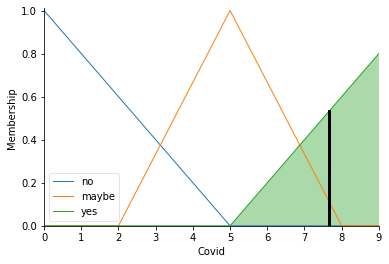

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
#EXAMPLE 2 -> expected yes
detecting.input['fever'] = 38.5
detecting.input['Cough'] = 1.9
detecting.input['DifficultyBreathing'] = 5
detecting.input['Fatigue'] = 1.0
detecting.input['MuscleAches'] = 4.7
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 2.0
detecting.input['SoreThroat'] = 5
detecting.input['Congestion'] = 3.4
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

7.530303030303031


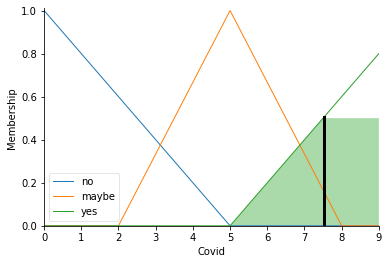

In [ ]:
#print(tipping.output['tip'])
#tip.view(sim=tipping)
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 3 -> expected yes

detecting.input['fever'] = 38.5
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 5
detecting.input['Fatigue'] = 5
detecting.input['MuscleAches'] = 5
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

7.530303030303031


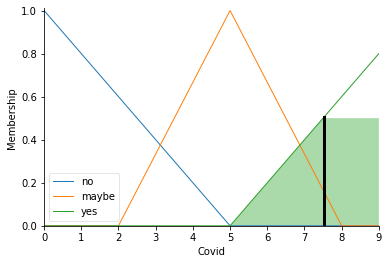

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 4 -> expected yes

detecting.input['fever'] = 40
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 2.7
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

7.666666666666666


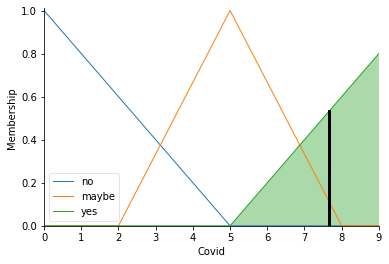

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 5 -> expected yes

detecting.input['fever'] = 37
detecting.input['Cough'] = 5
detecting.input['DifficultyBreathing'] = 2.5
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 2.5
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()


7.530303030303031


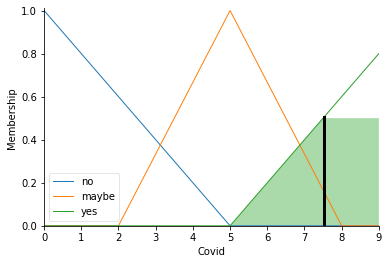

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 6 -> expected No

detecting.input['fever'] = 36
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 2
detecting.input['chest_tightness'] = 2
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 2
detecting.input['bluish_lips'] = 2
detecting.input['grizzled_skin'] = 2
detecting.input['pale_nail_beds'] = 2
detecting.input['nasal_discharge'] = 2
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

1.6666666666666665


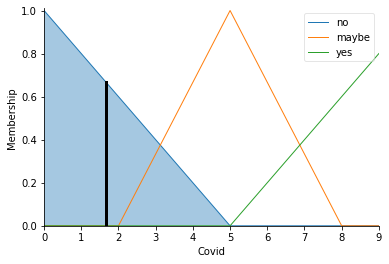

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 7 -> expected No
detecting.input['fever'] = 0
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 2
detecting.input['grizzled_skin'] = 2
detecting.input['pale_nail_beds'] = 2
detecting.input['nasal_discharge'] = 2
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

1.6666666666666665


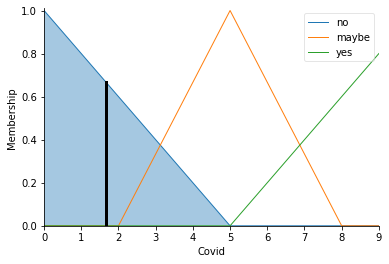

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 8 -> expected Maybe
detecting.input['fever'] = 0
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 2
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 4
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

3.496644295302013


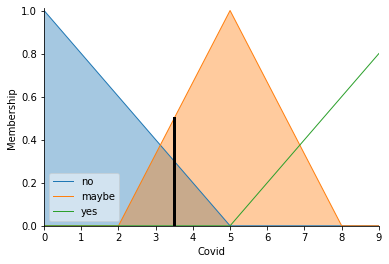

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 9 -> expected maybe
detecting.input['fever'] = 37.5
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 5
detecting.input['Congestion'] = 4.8
detecting.input['nausea'] = 4.6
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

5.0


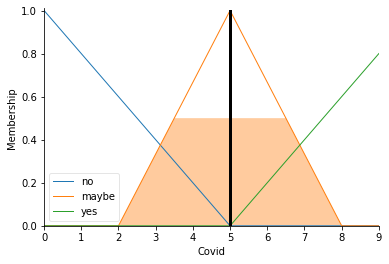

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 10 -> expected maybe
detecting.input['fever'] = 36.5
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 3
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 3
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 2
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 2.5
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 2

# Crunch the numbers
detecting.compute()

3.8800383877159303


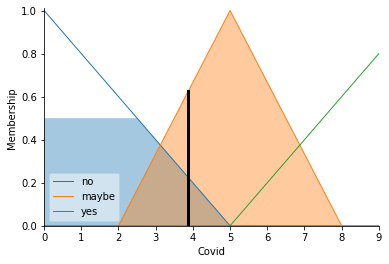

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 11 -> expected Maybe
detecting.input['fever'] = 39.8
detecting.input['Cough'] = 5
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 4
detecting.input['SmellLoss'] = 3.5
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 2
detecting.input['diarrhea'] = 2
detecting.input['chest_tightness'] = 2
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 2
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 2

# Crunch the numbers
detecting.compute()

5.836065573770491


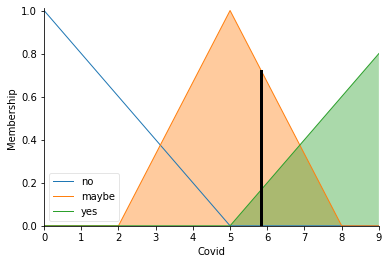

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 12 -> expected Maybe
detecting.input['fever'] = 0
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 5
detecting.input['nausea'] = 2
detecting.input['diarrhea'] = 2
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 2
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 2
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 2

# Crunch the numbers
detecting.compute()

3.496644295302013


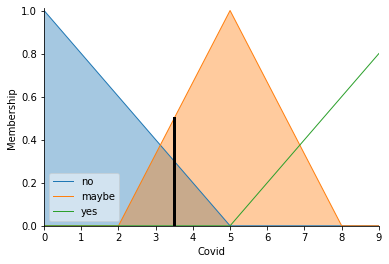

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 13 -> expected Yes
detecting.input['fever'] = 40
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

7.666666666666666


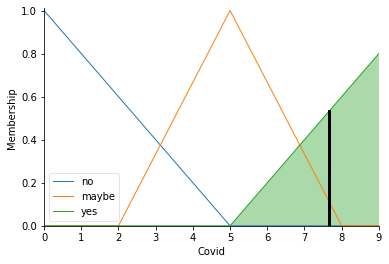

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 14 -> expected Yes
detecting.input['fever'] = 39
detecting.input['Cough'] = 2.5
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 5
detecting.input['MuscleAches'] = 5
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 5
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 2.5
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 2
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

7.666666666666666


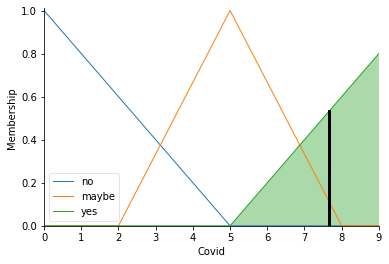

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 15 -> expected MAYBE
detecting.input['fever'] = 0
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 2.5
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 5
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

3.2281746031746033


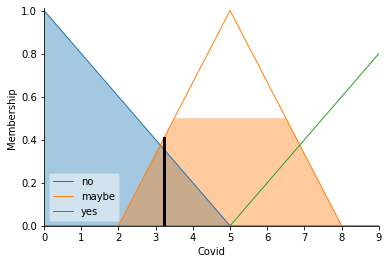

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 16 -> expected MAYBE
detecting.input['fever'] = 36.5
detecting.input['Cough'] = 2.5
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 2
detecting.input['grizzled_skin'] = 2
detecting.input['pale_nail_beds'] = 2
detecting.input['nasal_discharge'] = 2.5
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 2

# Crunch the numbers
detecting.compute()

3.2281746031746033


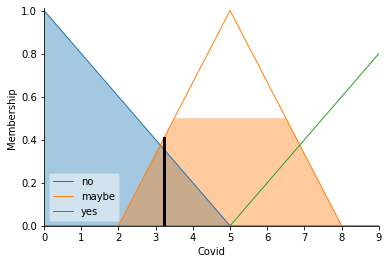

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 17 -> expected No
detecting.input['fever'] = 0
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 2
detecting.input['chest_tightness'] = 2
detecting.input['confusion'] = 5
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

1.6666666666666665


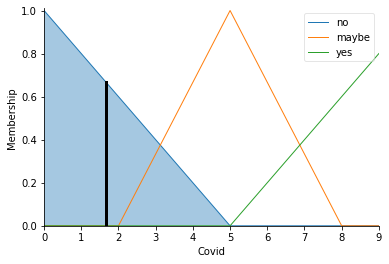

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 18 -> expected No
detecting.input['fever'] = 36
detecting.input['Cough'] = 0
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 0
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 2
detecting.input['bluish_lips'] = 2
detecting.input['grizzled_skin'] = 2
detecting.input['pale_nail_beds'] = 2
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

1.6666666666666665


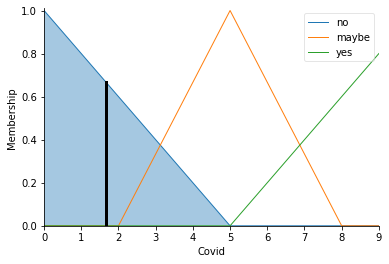

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 19 -> expected YES
detecting.input['fever'] = 37.6
detecting.input['Cough'] = 5
detecting.input['DifficultyBreathing'] = 2.5
detecting.input['Fatigue'] = 5
detecting.input['MuscleAches'] = 5
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 0
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 0
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 0
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 0
detecting.input['nasal_discharge'] = 0
detecting.input['pale_face'] = 0
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

7.530303030303031


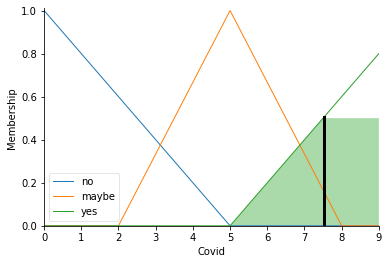

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

In [ ]:
# EXAMPLE N 20 -> expected Maybe
detecting.input['fever'] = 36
detecting.input['Cough'] = 1
detecting.input['DifficultyBreathing'] = 0
detecting.input['Fatigue'] = 2
detecting.input['MuscleAches'] = 0
detecting.input['Headache'] = 0
detecting.input['SmellLoss'] = 1
detecting.input['SoreThroat'] = 0
detecting.input['Congestion'] = 0
detecting.input['nausea'] = 0
detecting.input['diarrhea'] = 2
detecting.input['chest_tightness'] = 0
detecting.input['confusion'] = 0
detecting.input['difficulty_waking_up'] = 0
detecting.input['bluish_lips'] = 2
detecting.input['grizzled_skin'] = 0
detecting.input['pale_nail_beds'] = 2
detecting.input['nasal_discharge'] = 4
detecting.input['pale_face'] = 2
detecting.input['pain_when_swallowing'] = 0

# Crunch the numbers
detecting.compute()

4.325966850828729


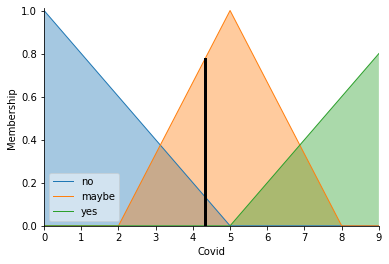

In [ ]:
print(detecting.output['Covid'])
Covid.view(sim=detecting)

--------------
The power of fuzzy systems is allowing complicated, intuitive behavior based
on a sparse system of rules with minimal overhead. Note our membership
function universes were coarse, only defined at the integers, but
``fuzz.interp_membership`` allowed the effective resolution to increase on
demand. This system can respond to arbitrarily small changes in inputs,
and the processing burden is minimal.
"""

## Conclusions

**REAL RESULTS**

If we want to use this model for a real practical situation we would to to collect data that can be fitted in the model that we created, this means that the values of the data collected should be aligned with the values that we assigned for each category, also we would need someone dedicated to give this data to the model and make inferences with them in order to know the answers that the model will give us using the corresponding input. It would be important also having a way of checking if the the inferences done by the model are accurate or not by comparing its results with the reality.

**IMPROVING THE MODEL**

In the other hand if we wanted to improve the sistem we will need to create more rules that contemplate more possibilities or realities, also we would need to be more precise defining those rules to be the most specific that we could, also improving the quality of the rules will have an impact in the quality of the model. These are some options available if you wanted to improve the model.

# TEORICAL PART

## Examples of medical expert system

### DXPlain

An example of an expert system applied to medicine could be the DXPlain system.
DxPlain is a decision support system developed at the Laboratory of Computer Science at the Massachusetts General Hospital.It uses a database of medical knowledge and a set of rules to generate a list of possible diagnoses for a patient based on their symptoms and other clinical information.The rules are based on the medical knowledge and expertise of the system's developers and are designed to reflect the way that a human expert might approach the diagnostic process.

DXplain generates ranked differential diagnoses using a pseudo-probabilistic algorithm.Each clinical finding entered into DXplain is assessed by determining the importance of the finding and how strongly the finding supports a given diagnosis for each disease in the knowledge base. Using this criterion, DXplain generates ranked differential diagnoses with the most likely diseases yielding the lowest rank. Using stored information regarding each disease’s prevalence and significance, the system differentiates between common and rare diseases.(https://en.wikipedia.org/wiki/DXplain#Clinical_usage)

The current DXplain knowledge base (KB) includes over 2600 diseases and over 5700 clinical findings (symptoms, signs, epidemiologic data and laboratory, endoscopic and radiologic findings).



**REFERENCE**: http://www.mghlcs.org/projects/dxplain


### Caduceus

Another example of a medical expert system is caduceus.
Caduceus is a medical expert system that work using an inference engine similar to MYCIN's,even though is similar it made a number of changes (like incorporating abductive reasoning) to deal with the additional complexity of internal disease- there can be a number of simultaneous diseases, and data is generally flawed and scarce.

It was intended to improve on MYCIN, which itself was based on DENDRAL and focused on infectious bacteria in the blood. CADUCEUS could eventually diagnose up to 1,000 different diseases, using an inference engine similar to MYCIN, using a directed acyclic graph representing causal relationships between variables.

**REFERENCES:**
https://es.wikipedia.org/wiki/CADUCEUS_(sistema_experto)
https://en.wikipedia.org/wiki/CADUCEUS_(expert_system)

## Example of a fuzzy logic expert system

### Systems for Medical Diagnosis using fuzzy set

We have a set of systems developed using the fuzzy logic, usign a set of fuzzy rules and a knowledge-based system this group of vietnamese people was able to create systems that are capable of Syndromes Differentiation in Oriental Traditional Medicine,an Expert System for Lung Diseases, a fuzzy system for classification of Western and Eastern medicaments, among others.

It is based on a study of the famous medical expert systems such as MYCIN and CADIAG, based on them and incorporating negative knowledge into fuzzy knowledge-based systems by using an ordered Abelian group. They design expert systems for lung disease diagnosis, for syndrome differentiation in eastern medicine and for diagnosis combining wester and eastern medicine in diagnosis and several others.

**REFERENCE:**

Fuzzy logic and its applications in medicine
Author: Nguyen HoangPhuong
https://www.sciencedirect.com/science/article/abs/pii/S1386505601001605


### Application of fuzzy expert systems in IT project management

Consider the following problem statement for an IT company. The model situation for projects is the availability of five teams (CycleDuo, Templater, Avion, Howl, and Converge) to develop existing and potential projects. A new team (Emerald) was also hired during the year, increasing the total number of available teams to six. The current market situation is to select five projects (Genesis, Crowding, Firantis, Exploration, and Hymera) from two customers (Mazzle, Global State). Also, additional information is provided on costs not directly related to current projects, namely the costs inherent in the maintenance of the office, administrative staff, and the cost of various advertising campaigns. Given the available data, the IT company faces the task of finding the best way to maximize annual profits.

In order to solve this problem we could apply our knowledge of the fuzzy logic and by using an expert system based on fuzzy logic using a combined model of the semantic network SNePS (Semantic Network Processing System) and fuzzy inference rules we could solve this problem.

**REFERENCE:**
https://www.intechopen.com/online-first/80289

## Examples of backwards chaining rules

Backward chaining is a concept in artificial intelligence that involves backtracking from the endpoint or goal to steps that led to the endpoint. This type of chaining starts from the goal and moves backward to comprehend the steps that were taken to attain this goal.
The backtracking process can also enable a person to establish logical steps that can be used to find other important solutions.




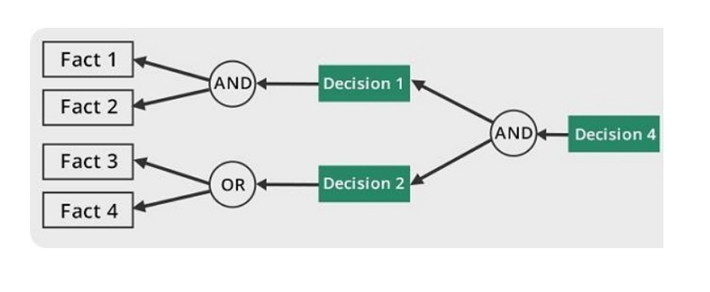


REFERENCE:  
https://www.section.io/engineering-education/forward-and-backward-chaining-in-ai/


Here are some original examples of backwards chaining rules:
1.	“The car turned off ““If a car runs out of fuel it will turn off” “The car runed out of fuel”.
2.	“The goal was not validated for the team” “If the striker is offside the goal will not count”” The striker was offside when he scored”.
3.	“The driver is guilty”” If the driver does not break when the light is red and crash, he is guilty” “The driver crash and didn’t break on the red light”.





## Defining ontology and giving an example

**DEFINITION:**

An ontology is a formal explicit description of concepts in a domain of discourse (classes (sometimes called concepts)), properties of each concept describing various features and attributes of the concept (slots (sometimes called roles or properties)), and restrictions on slots (facets (sometimes called role restrictions)). An ontology together with a set of individual instances of classes constitutes a knowledge base.

**REFERENCE:** https://protege.stanford.edu/publications/ontology_development/ontology101-noy-mcguinness.html

**EXAMPLE OF AN ANTOLOGY**

If we wanted to describe the roles of a football team we can create an ontology.
First we have two main classes the players and the managers.
Inside of the managers category we could divide each member of the coaching staff according to their role, taking this into account we could have a head coach, a physical trainer, a goalkeeper trainer, and a second coach.
Inside of the player class we could divide them into where in the field they play so we can have a goalkeeper a midfielder and striker each one with the positional characteristic of each position.
If we wanted more detail we can also divide each category in an specific postion in that part of the field as center defense/midfielder, right defense/midfielder, left defense/midfielder, striker, left wing and right wing each one with their role pretty define and with the rules of what to do in order to fit their role pretty well defined.
By doing this we have created an ontology for an specific field (football), with it corresponding classes ( defense, goalkeeper, etc), with properties for each one ( positioning, role, etc), resticctions (role, positioning, etc) and each player of our team would be an instance of one of the previously described classes.

